In [0]:
!curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0   2427      0 --:--:-- --:--:-- --:--:--  2427
    100% |████████████████████████████████| 5.7MB 7.8MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 576.2MB 31kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x62c60000 @  0x7f31251682a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
Cloning into 'course-v3'...
remote: Enumerating objects: 2583, done.
remote: Total 2583 (delta 0), re

In [0]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 5.3MB/s 
    100% |████████████████████████████████| 245kB 14.5MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/5a/2d/0c/9fc539e558586b9ed9127916a7f4e620163c24cc97460b1188
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [0]:
!mkdir -p /root/.kaggle
import json
with open('/root/.kaggle/kaggle.json', 'w') as outfile:
    json.dump({"username":"yokolet","key":"93e6215ff8545c2c157ab645a3134fe4"}, outfile)

!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!mkdir inputs
!kaggle competitions download -p inputs -c digit-recognizer

 78% 57.0M/73.2M [00:01<00:00, 33.0MB/s]
100% 73.2M/73.2M [00:01<00:00, 59.8MB/s]
100% 48.8M/48.8M [00:01<00:00, 21.3MB/s]

  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 134MB/s]


In [0]:
!ls -latr inputs

total 125148
drwxr-xr-x 1 root root     4096 Dec  7 19:13 ..
-rw-r--r-- 1 root root 76775041 Dec  7 19:13 train.csv
-rw-r--r-- 1 root root 51118296 Dec  7 19:13 test.csv
drwxr-xr-x 2 root root     4096 Dec  7 19:13 .
-rw-r--r-- 1 root root   240909 Dec  7 19:13 sample_submission.csv


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
input_df = pd.read_csv('inputs/train.csv')
print('train size', input_df.shape)
input_df.head()

train size (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
test_df = pd.read_csv('inputs/test.csv')
print('test size', test_df.shape)
test_df.head()

test size (28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
sample_df = pd.read_csv('inputs/sample_submission.csv')
print('sample size', sample_df.shape[0])
sample_df.head()

sample size 28000


,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [0]:
# data statistics
data = input_df.drop('label', axis=1)
print('max {}, min {}'.format(data.max().max(), data.min().min()))

max 255, min 0


In [0]:
TEST_SIZE=0.1
train, val = train_test_split(input_df, test_size=TEST_SIZE)
train.shape[0], val.shape[0]

(37800, 4200)

X: <class 'numpy.ndarray'> (1, 28, 28), y <class 'numpy.int64'> 3


Text(0.5,1,'3')

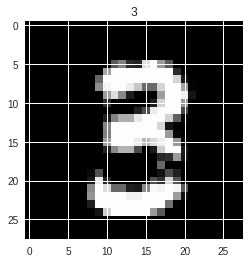

In [0]:
train_X = train.drop('label', axis=1).values.reshape(-1, 1, 28, 28) / 255 # reshape and normalize
train_y = train.label.values
print('X: {} {}, y {} {}'.format(
    type(train_X[0]), train_X[0].shape, type(train_y[0]), train_y[0]))
plt.imshow(train_X[0][0], cmap="gray")
plt.title(train_y[0])

X: <class 'numpy.ndarray'> (1, 28, 28), y <class 'numpy.int64'> 7


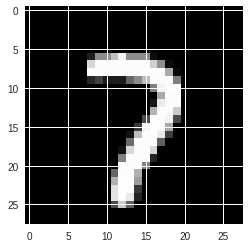

In [0]:
val_X = val.drop('label', axis=1).values.reshape(-1, 1, 28, 28) / 255 # reshape and normalize
val_y = val.label.values
print('X: {} {}, y {} {}'.format(
    type(val_X[0]), val_X[0].shape, type(val_y[0]), val_y[0]))
plt.imshow(val_X[0][0], cmap="gray")

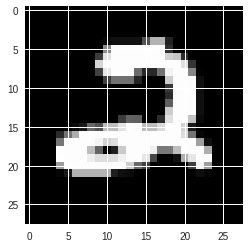

In [0]:
test_X = test_df.values.reshape(-1, 1, 28, 28) / 255 # reshape and normalize
test_id = np.arange(1, test_X.shape[0]+1)
plt.imshow(test_X[0][0], cmap="gray")

In [0]:
train_X.shape, val_X.shape, test_X.shape

((37800, 1, 28, 28), (4200, 1, 28, 28), (28000, 1, 28, 28))

In [0]:
# convert to torch tensor
train_X_, train_y_ = map(torch.tensor, (train_X, train_y))
val_X_, val_y_ = map(torch.tensor, (val_X, val_y))
test_X_, test_id_ = map(torch.tensor, (test_X, test_id))
train_X_.shape, train_y_.min(), train_y_.max()

(torch.Size([37800, 1, 28, 28]), tensor(0), tensor(9))

In [0]:
train_ds = TensorDataset(train_X_, train_y_)
setattr(train_ds, 'classes', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
setattr(train_ds, 'c', 10)
train_ds.classes, train_ds.c

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 10)

In [0]:
val_ds = TensorDataset(val_X_, val_y_)
setattr(val_ds, 'classes', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
setattr(val_ds, 'c', 10)
val_ds.classes, val_ds.c

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 10)

In [0]:
test_size = test_X_.shape[0]
#test_ds = TensorDataset(test_X, train_y[:test_size])
test_ds = TensorDataset(test_X_, test_id_)

In [0]:
BATCH_SIZE = 100

In [0]:
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False)

In [0]:
data_bunch = DataBunch.create(train_ds, val_ds, test_ds=test_ds, bs=BATCH_SIZE)

In [0]:
#data_bunch = ImageDataBunch(train_dl, val_dl, test_dl)

In [0]:
# test data
x, y = next(iter(data_bunch.train_dl))
x.shape, y.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

In [0]:
# define model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d(p=0.25)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.float()
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [0]:
model = Net().cuda()
model

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.25)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [0]:
[p.shape for p in model.parameters()]

[torch.Size([10, 1, 5, 5]),
 torch.Size([10]),
 torch.Size([20, 10, 5, 5]),
 torch.Size([20]),
 torch.Size([50, 320]),
 torch.Size([50]),
 torch.Size([10, 50]),
 torch.Size([10])]

In [0]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [0]:
# torch.nn.BatchNorm2d(num_features, eps=1e-05, momentum=0.1,
#                      affine=True, track_running_stats=True)

In [0]:
# define model
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3)
        self.norm1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3)
        self.drop1 = nn.Dropout2d(p=0.25)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3)
        self.norm2 = nn.BatchNorm2d(32)
        self.conv4 = nn.Conv2d(32, 32, kernel_size=3)
        self.fc1 = nn.Linear(512, 256)
        self.fc2 = nn.Linear(256, 128)
        self.drop2 = nn.Dropout2d(p=0.5)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.float()
        x = F.relu(self.conv1(x))
        x = self.norm1(x)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(self.norm1(x), 2)
        x = self.drop1(x)
        
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.drop1(self.conv2(x)), 2))
        
        x = F.relu(self.conv3(x))
        x = self.norm2(x)
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(self.norm2(x), 2)
        x = self.drop1(x)

        x = x.view(-1, 512)
        x = F.relu(self.fc1(x))
        x = drop1(x)
        x = F.relu(self.fc2(x))
        x = self.drop2(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

In [0]:
model2 = Net2().cuda()
model2

Net2(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (norm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (drop1): Dropout2d(p=0.25)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (drop2): Dropout2d(p=0.5)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

In [0]:
[p.shape for p in model2.parameters()]

[torch.Size([16, 1, 3, 3]),
 torch.Size([16]),
 torch.Size([16]),
 torch.Size([16]),
 torch.Size([16, 16, 3, 3]),
 torch.Size([16]),
 torch.Size([32, 16, 3, 3]),
 torch.Size([32]),
 torch.Size([32]),
 torch.Size([32]),
 torch.Size([32, 32, 3, 3]),
 torch.Size([32]),
 torch.Size([256, 512]),
 torch.Size([256]),
 torch.Size([128, 256]),
 torch.Size([128]),
 torch.Size([10, 128]),
 torch.Size([10])]

In [0]:
x = torch.randn(3, 1, 28, 28)
conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=0)
x = conv1(x)
print('conv1', x.size())
norm1 = nn.BatchNorm2d(16)
x = norm1(x)
print('norm1', x.size())
conv2 = nn.Conv2d(16, 16, kernel_size=3, padding=0)
x = conv2(x)
print('conv2', x.size())
x = norm1(x)
print('norm1', x.size())
x = F.max_pool2d(x, 2)
print('pool1', x.size())
drop1 = nn.Dropout2d(p=0.25)
x = drop1(x)
print('drop1', x.size())

conv3 = nn.Conv2d(16, 32, kernel_size=3, padding=0)
x = conv3(x)
print('conv3', x.size())
norm2 = nn.BatchNorm2d(32)
x = norm2(x)
print('norm2', x.size())
conv4 = nn.Conv2d(32, 32, kernel_size=3, padding=0)
x = conv4(x)
print('conv4', x.size())
x = norm2(x)
print('norm2', x.size())
x = F.max_pool2d(x, 2)
print('pool2', x.size())
x = drop1(x)
print('drop1', x.size())

x = x.view(-1, 512)
print('view', x.size())
fc1 = nn.Linear(512, 256)
x = fc1(x)
print('fc1', x.size())
x = drop1(x)
print('drop1', x.size())
fc2 = nn.Linear(256, 128)
x = fc2(x)
print('fc2', x.size())
drop2 = nn.Dropout2d(p=0.5)
x = drop2(x)
print('drop2', x.size())
fc3 = nn.Linear(128, 10)
x = fc3(x)
print('fc3', x.size())
x = F.log_softmax(x, dim=1)
print('softmax', x.size())

conv1 torch.Size([3, 16, 26, 26])
norm1 torch.Size([3, 16, 26, 26])
conv2 torch.Size([3, 16, 24, 24])
norm1 torch.Size([3, 16, 24, 24])
pool1 torch.Size([3, 16, 12, 12])
drop1 torch.Size([3, 16, 12, 12])
conv3 torch.Size([3, 32, 10, 10])
norm2 torch.Size([3, 32, 10, 10])
conv4 torch.Size([3, 32, 8, 8])
norm2 torch.Size([3, 32, 8, 8])
pool2 torch.Size([3, 32, 4, 4])
drop1 torch.Size([3, 32, 4, 4])
view torch.Size([3, 512])
fc1 torch.Size([3, 256])
drop1 torch.Size([3, 256])
fc2 torch.Size([3, 128])
drop2 torch.Size([3, 128])
fc3 torch.Size([3, 10])
softmax torch.Size([3, 10])


In [0]:
conv1 = nn.Conv2d(1, 16, kernel_size=5, padding=0)
conv2 = nn.Conv2d(16, 16, kernel_size=5, padding=0)
conv3 = nn.Conv2d(16, 32, kernel_size=5, padding=0)
drop1 = nn.Dropout2d(p=0.25)
drop2 = nn.Dropout2d(p=0.5)
fc1 = nn.Linear(512, 256)
fc2 = nn.Linear(256, 10)

x = torch.randn(3, 1, 28, 28)
print('input', x.size())
x = F.relu(F.max_pool2d(conv1(x), 2))
print('conv1, pool, relu', x.size())
#x = F.relu(F.max_pool2d(conv2(x), 2))
#print('conv2, drop, pool, relu', x.size())
x = F.relu(F.max_pool2d(drop1(conv3(x)), 2))
print('conv3, drop, pool, relu', x.size())
x = x.view(-1, 512)
print('view', x.size())
x = F.relu(fc1(x))
print('fc1, relu', x.size())
x = drop2(x)
print('drop2', x.size())
x = fc2(x)
print('fc2', x.size())
x = F.log_softmax(x, dim=1)
print('softmax', x.size())

input torch.Size([3, 1, 28, 28])
conv1, pool, relu torch.Size([3, 16, 12, 12])
conv3, drop, pool, relu torch.Size([3, 32, 4, 4])
view torch.Size([3, 512])
fc1, relu torch.Size([3, 256])
drop2 torch.Size([3, 256])
fc2 torch.Size([3, 10])
softmax torch.Size([3, 10])


In [0]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, padding=0)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=5, padding=0)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=5, padding=0)
        self.drop1 = nn.Dropout2d(p=0.25)
        self.drop2 = nn.Dropout2d(p=0.5)
        self.fc1 = nn.Linear(512, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.float()
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.drop1(self.conv3(x)), 2))
        x = x.view(-1, 512)
        x = F.relu(self.fc1(x))
        x = self.drop2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [0]:
model3 = Net3().cuda()
model3

Net3(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (drop1): Dropout2d(p=0.25)
  (drop2): Dropout2d(p=0.5)
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)

In [0]:
lr=2e-2

In [0]:
loss_func = nn.CrossEntropyLoss()

In [0]:
def update(m, x, y, lr):
    opt = optim.Adam(m.parameters(), lr)
    y_hat = m(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [0]:
losses = [update(model3, x, y, 1e-3) for x, y in data_bunch.train_dl]

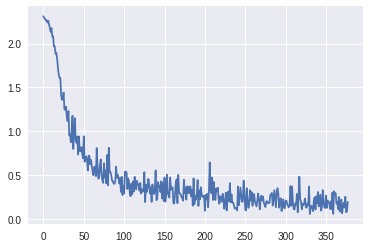

In [0]:
plt.plot(losses)

In [0]:
learn = Learner(data_bunch, Net3(), loss_func=loss_func, metrics=[accuracy])

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


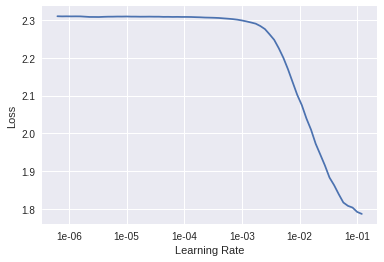

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy
1,0.439003,0.264777,0.922381
2,0.159091,0.088650,0.972619
3,0.101303,0.068729,0.979286
4,0.089500,0.054357,0.984762
5,0.068262,0.050309,0.983810
6,0.053931,0.039999,0.988095
7,0.050181,0.033803,0.988810
8,0.044288,0.031376,0.990714
9,0.034064,0.032796,0.990000
10,0.028213,0.031178,0.990238


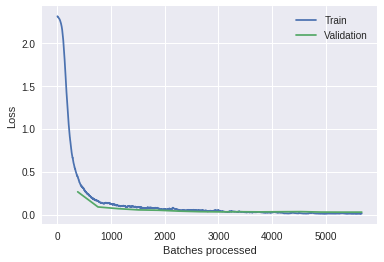

In [0]:
learn.recorder.plot_losses()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

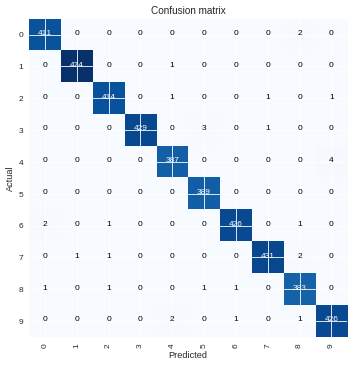

In [0]:
interp.plot_confusion_matrix(figsize=(6, 6), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[(4, 9, 4), (3, 5, 3)]

In [0]:
preds, out = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
preds.size()

torch.Size([28000, 10])

In [0]:
preds[:5]

tensor([[4.9538e-12, 2.1620e-13, 1.0000e+00, 1.0625e-09, 9.9504e-13, 5.4501e-18,
         3.7914e-16, 2.6048e-11, 1.9172e-12, 8.4144e-15],
        [1.0000e+00, 3.7047e-13, 2.5669e-09, 2.6698e-12, 4.3469e-12, 1.9986e-10,
         4.2957e-08, 5.4159e-11, 2.3332e-10, 1.1511e-09],
        [2.7344e-15, 3.3137e-14, 1.4718e-13, 6.3924e-12, 7.0355e-07, 3.7977e-13,
         1.5634e-19, 1.6721e-09, 2.4343e-09, 1.0000e+00],
        [8.1703e-02, 7.8189e-11, 9.6000e-05, 6.2761e-06, 1.3285e-05, 2.2289e-07,
         1.6469e-08, 1.0042e-04, 4.4099e-06, 9.1808e-01],
        [2.7905e-13, 4.3743e-11, 3.6177e-09, 1.0000e+00, 2.1209e-15, 1.4122e-09,
         8.6600e-14, 4.8329e-11, 1.6029e-08, 3.0042e-12]])

In [0]:
out[:5], out[-5:]

(tensor([1, 2, 3, 4, 5]), tensor([27996, 27997, 27998, 27999, 28000]))

In [0]:
y_pred = np.argmax(preds.cpu().numpy(), axis=1)
y_pred.shape

(28000,)

In [0]:
y_pred[:5]

array([2, 0, 9, 9, 3])

In [0]:
submit_df = pd.DataFrame({'ImageId': out.numpy(), 'Label': y_pred})
submit_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [0]:
submit_df.to_csv("submission.csv", index=False)

In [0]:
!kaggle competitions submit -c digit-recognizer -f submission.csv -m "first submission"

100% 208k/208k [00:04<00:00, 43.2kB/s]
Successfully submitted to Digit Recognizer